In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DAICON 쇼핑몰 지점별 매출액 예측 경진대회

발표자 강인구 

#1. EDA

In [57]:
sample_submission = pd.read_csv('/content/drive/MyDrive/Dataset/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

In [58]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [59]:
train.isnull().sum()

id                 0
Store              0
Date               0
Temperature        0
Fuel_Price         0
Promotion1      4153
Promotion2      4663
Promotion3      4370
Promotion4      4436
Promotion5      4140
Unemployment       0
IsHoliday          0
Weekly_Sales       0
dtype: int64

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


Promotion 같은 경우 행사에 따른 정보로 float 형태인 것을 보아 데이터 값이 행사로 인한 판매량이나 판매금액 또는 퍼센트를 알려주는 것인 것을 알 수 있다.

In [61]:
train=train.fillna(0)
test=test.fillna(0)
sample_submission=sample_submission.fillna(0)

In [62]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [63]:
def toDateTime(df):
  df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
  return df

In [64]:
train= toDateTime(train)
test = toDateTime(test)

In [65]:
train.sort_values(by =['Date'], inplace= True, ascending= False)
train[train['Store']==1].head(28)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
138,139,1,2012-09-28,76.08,3.666,3666.27,7.64,1.65,1417.96,4744.28,6.908,False,1437059.26
137,138,1,2012-09-21,69.87,3.721,6352.30,7.64,4.69,1010.06,6456.71,6.908,False,1506126.06
136,137,1,2012-09-14,74.97,3.717,17212.52,7.00,18.79,1523.11,7992.72,6.908,False,1517428.87
135,136,1,2012-09-07,83.96,3.730,5204.68,35.74,50.94,4120.32,2737.17,6.908,True,1661767.33
134,135,1,2012-08-31,80.49,3.638,21442.73,102.32,21.70,13209.64,3032.96,6.908,False,1582083.40
133,134,1,2012-08-24,77.66,3.620,6237.83,260.06,2.97,3463.03,7988.25,6.908,False,1494122.38
132,133,1,2012-08-17,84.85,3.571,3662.06,137.86,4.84,2752.20,3446.15,6.908,False,1597868.05
131,132,1,2012-08-10,85.05,3.494,11436.22,245.00,6.85,6964.26,4836.22,6.908,False,1592409.97
130,131,1,2012-08-03,86.11,3.417,27584.78,119.98,30.23,12007.04,4661.71,6.908,False,1631135.79
129,130,1,2012-07-27,82.66,3.407,7146.90,389.02,1.59,10267.54,4325.19,6.908,False,1439123.71


In [66]:
train.sort_values(by =['Date'], inplace= True, ascending= True)
train[train['Store']==1].head(30)

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68
5,6,1,2010-03-12,57.79,2.667,0.0,0.0,0.0,0.0,0.0,8.106,False,1439541.59
6,7,1,2010-03-19,54.58,2.720,0.0,0.0,0.0,0.0,0.0,8.106,False,1472515.79
7,8,1,2010-03-26,51.45,2.732,0.0,0.0,0.0,0.0,0.0,8.106,False,1404429.92
8,9,1,2010-04-02,62.27,2.719,0.0,0.0,0.0,0.0,0.0,7.808,False,1594968.28
9,10,1,2010-04-09,65.86,2.770,0.0,0.0,0.0,0.0,0.0,7.808,False,1545418.53


여기서 데이터는 2010-02-05부터 2012-09-28까지의 조사한 것을 알 수 있다 즉 해당 숫자에서 한 20퍼센트만 validation 값으로 넣는다

In [67]:
train['Date'].value_counts()

2010-02-05    45
2011-12-02    45
2011-10-21    45
2011-10-28    45
2011-11-04    45
              ..
2010-11-12    45
2010-11-05    45
2010-10-29    45
2010-10-22    45
2012-09-28    45
Name: Date, Length: 139, dtype: int64

In [68]:
train['Date'].sort_values()

0      2010-02-05
4448   2010-02-05
1807   2010-02-05
4587   2010-02-05
6116   2010-02-05
          ...    
277    2012-09-28
3057   2012-09-28
5142   2012-09-28
416    2012-09-28
6254   2012-09-28
Name: Date, Length: 6255, dtype: datetime64[ns]

해당 지점수 만큼 공통된 날짜를 가지고 있고 데이트는 139의 데이터가 있으니 



In [69]:
cutOff = pd.to_datetime('2012-03-23')
trains = train[train['Date'] < cutOff]
vals = train[(train['Date'] >= cutOff)]


In [70]:
trains.shape, vals.shape

((4995, 13), (1260, 13))

#**해당 dataset분석**

##1. train.csv : 학습 데이터

*  id : 샘플 아이디

*  Store : 쇼핑몰 지점

*  Date : 주 단위(Weekly) 날짜

*  Temperature : 해당 쇼핑몰 주변 기온(F)

*  Fuel_Price : 해당 쇼핑몰 주변 연료 가격

*  Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보

*  Unemployment : 해당 쇼핑몰 지역의 실업률

*  IsHoliday : 해당 기간의 공휴일 포함 여부

*  Weekly_Sales : 주간 매출액 (목표 예측값)


##2. test.csv : 테스트 데이터

*  id : 샘플 아이디

*  Store : 쇼핑몰 지점

*  Date : 주 단위(Weekly) 날짜

*  Temperature : 해당 쇼핑몰 주변 기온(F)

*  Fuel_Price : 해당 쇼핑몰 주변 연료 가격

*  Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보

*  Unemployment : 해당 쇼핑몰 지역의 실업률

*  IsHoliday : 해당 기간의 공휴일 포함 여부

##3. Target : Weekly_Sales 


In [74]:
def Date_to_int(train):
  train['Date'] = train['Date'].apply(lambda x: x.strftime('%Y%m%d'))
  train['Date'] = train['Date'].astype(int)
  return train

In [75]:
trains = Date_to_int(trains)
vals = Date_to_int(vals)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
target = 'Weekly_Sales'

## X_train, y_train, X_test, y_test 데이터로 분리
X_train = trains.drop(columns=target)
y_train = trains[target]
X_val = vals.drop(columns=target)
y_val = vals[target]

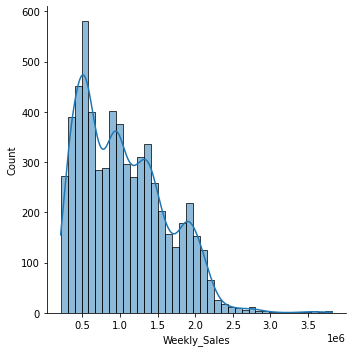

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(train['Weekly_Sales'],kde=True);

In [79]:
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression, k=7)

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)

## 테스트 데이터는 transform
X_val_selected = selector.transform(X_val)


X_train_selected.shape, X_val_selected.shape

((4995, 7), (1260, 7))

In [80]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['id', 'Store', 'Promotion1', 'Promotion3', 'Promotion4', 'Promotion5',
       'Unemployment'],
      dtype='object')
Unselected names:  Index(['Date', 'Temperature', 'Fuel_Price', 'Promotion2', 'IsHoliday'], dtype='object')


In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

def RMSE(y, y_pred):
    return mean_squared_error(y, y_pred)**0.5